In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from sklearn.model_selection import train_test_split


In [3]:
cd Data

C:\Users\benia\Desktop\Machine_Learning\Korona wyzwań\Challenge 3\Data


In [4]:
X = np.load("X.npy")
y = np.load("y.npy")


In [5]:
print(X.shape, y.shape)

(3612, 60, 80, 3) (3612,)


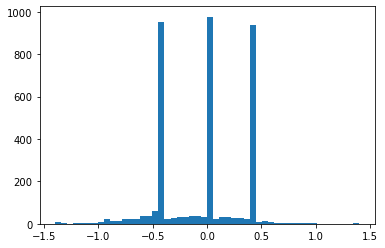

In [6]:
plt.hist(y,50);


0.0


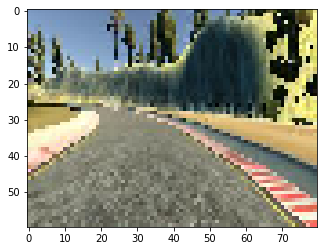

0.1


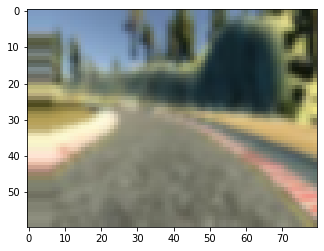

In [7]:
def augment(img,steering_angle):
  #Flip
  if random.random()>0.5:
    img=img[:,::-1,:]
    steering_angle = -steering_angle
  #Blur
  blurer = iaa.GaussianBlur(iap.Uniform(0.1, 2.0))
  img = blurer.augment_image(img)
  #Shuffle
  sh = iaa.ChannelShuffle(p=0.5)
  img=sh.augment_image(img)
  #Fog
  fog = iaa.Fog()
  fog.augment_image(img)
  #translate
  tx= random.randint(-20,20)
  translater = iaa.Affine(translate_px={"x":tx},mode = "edge")
  img = translater.augment_image(img)
  steering_angle += tx*0.02
  return img,steering_angle

plt.imshow(X[0])
print(y[0])
plt.show();
img,angle = augment(X[0],y[0])
plt.imshow(img)
print(angle)
plt.show();

In [8]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42) 

In [9]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(2889, 60, 80, 3) (2889,)
(723, 60, 80, 3) (723,)


In [10]:
Xgen=[]
ygen=[]
for i in range(1000):
  img,angle=augment(X[i],y[i])
  Xgen.append(img)
  ygen.append(angle)

Xgen= np.array(Xgen)
ygen= np.array(ygen)
print(Xgen.shape , ygen.shape)

(1000, 60, 80, 3) (1000,)


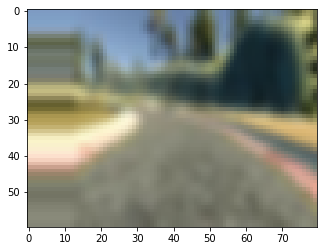

In [11]:
plt.imshow(Xgen[0])

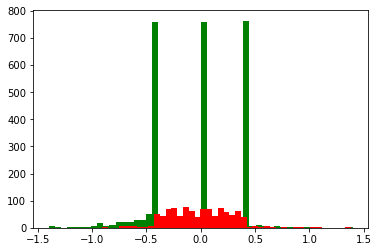

In [12]:
plt.hist(y_train,50,facecolor="green");
plt.hist(ygen,50,facecolor="red");